In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [2]:
# internally it is using genrator concept which is there in python

train_ds=keras.utils.image_dataset_from_directory(
    directory=r'E:\VScodeNehal\cnn\dogs_vs_cats\train',
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"

)

validation_ds=keras.utils.image_dataset_from_directory(
    directory=r'E:\VScodeNehal\cnn\dogs_vs_cats\test',
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"


)

Found 17939 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [3]:
#normalize
def process(image,label):
  tf.cast(image/255,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [4]:
model=Sequential()

In [5]:
#1st convolution layer #kisi b layer me pooling mandatory ni h, laga b skte h r ni b
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#2nd convo layer
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#3rd convo layer
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convert data into 1D array
model.add(Flatten())

#adding 1st hidden layer with 128 neurons
model.add(Dense(128,activation='relu'))

#adding 2nd hidden layer with 64 neuron
model.add(Dense(64,activation='relu'))

#we have 1 output
model.add(Dense(1,activation='sigmoid')) #sigmoid bcz of binary classification

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
model.fit(train_ds,epochs=2,validation_data=validation_ds)

Epoch 1/2
561/561 [==============================] - 462s 822ms/step - loss: 2.0974 - accuracy: 0.5985 - val_loss: 0.6895 - val_accuracy: 0.5452
Epoch 2/2
561/561 [==============================] - 877s 2s/step - loss: 0.6537 - accuracy: 0.6339 - val_loss: 0.6863 - val_accuracy: 0.5758


In [10]:
import matplotlib.pyplot as plt

In [11]:
dog_img=plt.imread(r"E:\VScodeNehal\cnn\download.jpg")

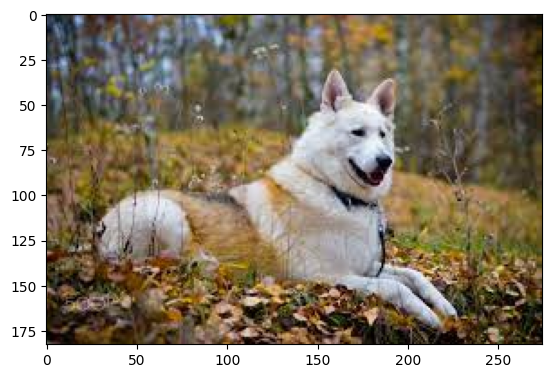

In [12]:
plt.imshow(dog_img)

In [13]:
cat_img=plt.imread(r"E:\VScodeNehal\cnn\cat.jpg")

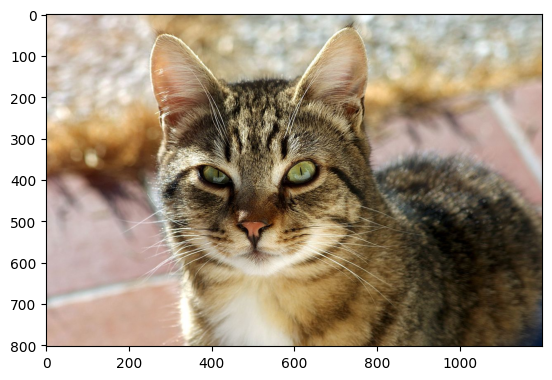

In [14]:
plt.imshow(cat_img)

In [15]:
dog_img.shape

(183, 275, 3)

In [16]:
cat_img.shape

(803, 1200, 3)

In [18]:
import cv2

In [19]:
#from keras.src.backend import resize_images
dog_resize=cv2.resize(dog_img,(256,256))
cat_resize=cv2.resize(cat_img,(256,256))

In [20]:
dog_resize.shape

(256, 256, 3)

In [21]:
cat_resize.shape

(256, 256, 3)

In [22]:
dog_resize=dog_resize.reshape((1,256,256,3))

In [23]:
dog_resize.shape

(1, 256, 256, 3)

In [24]:
cat_resize=cat_resize.reshape((1,256,256,3))

In [25]:
cat_resize.shape

(1, 256, 256, 3)

In [26]:
pred=model.predict(dog_resize)

1/1 [==============================] - 0s 115ms/step


In [27]:
pred

array([[0.45931244]], dtype=float32)

In [28]:
pred_1=model.predict(cat_resize)

1/1 [==============================] - 0s 78ms/step


In [29]:
pred_1

array([[0.5394371]], dtype=float32)

In [32]:
if pred_1==0.5394371:
  print('this is the image of cat')
else:
  print('this is the image of dog')

this is the image of cat


In [34]:
model.save('E:\VScodeNehal\cnn/dog_cat.h5')

e:\VScodeNehal\cnn\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
